In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [3]:
# Load MNIST dataset
dataset = keras.datasets.mnist.load_data()

In [4]:
# NOt a DataFrame, instead a TUPLE
type(dataset)

tuple

In [5]:
# 60000 Training images, 10000 test images
print(len(dataset[0][0]))
print(len(dataset[0][1]))
print(len(dataset[1][0]))
print(len(dataset[1][1]))

60000
60000
10000
10000


In [6]:
import numpy as np

In [7]:
# Unpacking tuples into var's
(X_train,y_train), (X_test, y_test)  = dataset

In [8]:
# 28x28 images
X_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
print(y_train[1000])

0


In [13]:
X_train[1000].shape

(28, 28)

In [14]:
# Sample image into matrix
print(X_train[1000])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  36 146 254 255
  251  95   6   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  97 234 254 254 232
  254 254  35   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  89 140 254 254 174  67  33
  200 254 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 108 253 254 235  51   

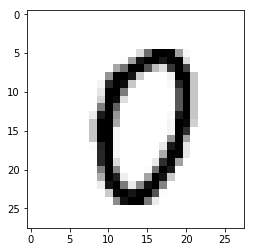

In [15]:
plt.imshow(X_train[1000], cmap="binary")

In [16]:
# Since Keras accept images in 4D, and it is greyscale image so  additional 1D is added  which is "1" 
X_train = X_train.reshape(X_train.shape[0],28,28,1)

In [17]:
X_train.shape

(60000, 28, 28, 1)

In [18]:
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [19]:
# Converting int to float.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [20]:
X_train[100][10][10][0]

207.0

In [21]:
# Normalisation Step. values are now between (0 to 1)
X_train /= 255
X_test /= 255

In [22]:
X_train[100][10][10][0]

0.8117647

In [23]:
# Initializing neural network layer
classifier = Sequential()

In [24]:
# first layer - convolutional 
# 32 - filter maps
# (3,3) - filter map dimension
classifier.add(Conv2D(32,(3,3), input_shape=(28,28,1), activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [26]:
classifier.add(Flatten())

In [27]:
# Adding ANN layers
classifier.add(Dense(units=128,activation="relu"))

In [28]:
# output layer
classifier.add(Dense(units=10,activation="softmax"))

In [29]:
# Compiling NN ,
# sparse_categorical_crossentropy because here, we have multi-class-classification 
classifier.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [30]:
classifier.fit(X_train,y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 46s 773us/step - loss: 0.1466 - acc: 0.9562
Epoch 2/10
60000/60000 [==============================] - 47s 788us/step - loss: 0.0499 - acc: 0.98521s - loss
Epoch 3/10
60000/60000 [==============================] - 47s 791us/step - loss: 0.0320 - acc: 0.9896
Epoch 4/10
60000/60000 [==============================] - 48s 801us/step - loss: 0.0204 - acc: 0.9933
Epoch 5/10
60000/60000 [==============================] - 48s 795us/step - loss: 0.0143 - acc: 0.9953
Epoch 6/10
60000/60000 [==============================] - 49s 810us/step - loss: 0.0107 - acc: 0.99661s - loss
Epoch 7/10
60000/60000 [==============================] - 50s 829us/step - loss: 0.0070 - acc: 0.9980
Epoch 8/10
60000/60000 [==============================] - 50s 841us/step - loss: 0.0072 - acc: 0.9976
Epoch 9/10
60000/60000 [==============================] - 50s 826us/step - loss: 0.0044 - acc: 0.9984
Epoch 10/10
6000

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
# Predicited probabilties of all classes
y_pred.shape

(10000, 10)

In [33]:
y_pred[0]

array([6.7586060e-14, 7.4116440e-14, 9.7872532e-10, 6.8671122e-09,
       1.8408687e-14, 3.1260151e-15, 4.3075261e-18, 1.0000000e+00,
       1.0740074e-13, 1.4830316e-12], dtype=float32)

In [34]:
# Taking maximum probabilty 
y_pred = [x.argmax() for x in y_pred]

In [35]:
y_pred[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [36]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report , f1_score

In [37]:
print("Accuracy Score - " ,accuracy_score(y_test,y_pred))

Accuracy Score -  0.9855


In [38]:
print("----Confusion Matrix----")
print(confusion_matrix(y_test,y_pred))

----Confusion Matrix----
[[ 974    1    0    1    0    1    2    1    0    0]
 [   0 1126    4    0    0    1    1    1    2    0]
 [   1    0 1023    0    1    0    1    6    0    0]
 [   0    0    3  994    0    8    0    2    3    0]
 [   0    0    1    0  978    0    2    0    0    1]
 [   0    0    0    6    0  885    1    0    0    0]
 [   3    2    0    0    3    2  945    0    3    0]
 [   0    3    8    0    0    0    0 1015    2    0]
 [   2    0    5    1    2    4    2    2  952    4]
 [   1    1    0    4   20    7    0    8    5  963]]


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.95      0.97      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [40]:
classifier.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 160us/step


[0.057525153322110965, 0.9855]

In [41]:
#  Testing model for one single image

In [42]:
X_test[888]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

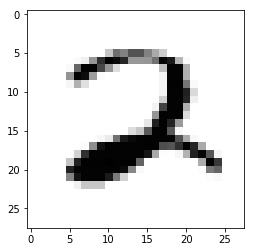

In [43]:
plt.imshow(X_test[888].reshape(28,28), cmap="Greys")

In [44]:
pred = classifier.predict(X_test[888].reshape(1,28,28,1))

In [45]:
print("Predicted : - " , pred.argmax())
print("Actual :- ", y_test[888])

Predicted : -  2
Actual :-  2


In [46]:
# classifier.save("mnist.h5")

In [47]:
# from keras.models import load_model

In [48]:
# model = load_model("mnist.h5")

In [49]:
from keras.preprocessing import image

In [50]:
# Loading all custom images from directory in an array to check the model performance
import glob
images = []
for img in glob.glob("pics/*.png"):
    n= image.load_img(img,grayscale=True,color_mode="grayscale", target_size=(28,28))
    images.append(n)

C:\Users\Mohit Uniyal\Anaconda3\envs\tensorflow\lib\site-packages\keras_preprocessing\image\utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [51]:
for pic in images:
    pic = image.img_to_array(pic)
    pic = 255-pic
    pic = pic/255
    print(classifier.predict(pic.reshape(1,28,28,1)).argmax())

2
5
1
3
7
1
4
5
